In [2]:
import ultralytics
from ultralytics import YOLO

import numpy as np
import io
from glob import glob
import cv2
from PIL import Image
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as transforms
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [2]:
# plt.rcParams["figure.figsize"] = [3.0, 3.0]

In [3]:
%cd /Users/GitHub/Projects/AI_Project/yolov8-robot-cleaner/modules/YOLO-V8-CAM

from yolo_cam.eigen_cam import EigenCAM
from yolo_cam.utils.image import show_cam_on_image, scale_cam_image

%cd ../../

/Users/GitHub/Projects/AI_Project/yolov8-robot-cleaner/modules/YOLO-V8-CAM
/Users/GitHub/Projects/AI_Project/yolov8-robot-cleaner


In [4]:
pretrained_weights = '/Users/GitHub/Projects/AI_Project/yolov8-robot-cleaner/yolov8n_rawimg_hsv(off)_mosaic3.pt'
model = YOLO(pretrained_weights)

In [5]:
val_img_path = '/Users/GitHub/Projects/AI_Project/yolov8-robot-cleaner/data/dataset2/valid/images'
img_list = glob(f'{val_img_path}/*.jpg')


0: 640x640 1 usb, 61.3ms
Speed: 2.5ms preprocess, 61.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


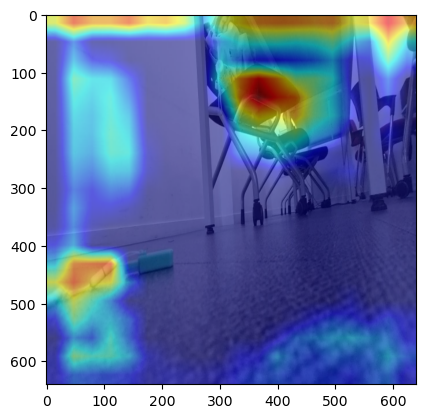

In [23]:
# Image Preprocessing
img = cv2.imread(img_list[0])
img = cv2.resize(img, (640, 640))
rgb_img = img.copy()
img = np.float32(img) / 255

# Set target layers to get feature map
target_layers =[model.model.model[-4]]

# Eigen-CAM
cam = EigenCAM(model, target_layers,task='od')
grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)

# Show Image
plt.imshow(cam_image)

In [7]:
results = model.predict(img_list[0])  # return a list of Results objects


image 1/1 /Users/GitHub/Projects/AI_Project/yolov8-robot-cleaner/data/dataset2/valid/images/R-usb-L-1-0_mp4-14_jpg.rf.56e762e6210e25ba92988c79856b3cad.jpg: 384x640 1 usb, 42.9ms
Speed: 1.3ms preprocess, 42.9ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)


In [8]:
list(results[0].boxes.boxes.numpy())

WARNING ⚠️ 'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.


[array([    0.25287,      458.18,      442.39,      587.81,     0.88646,          26], dtype=float32)]